# **Task 1: Data Cleaning & Preprocessing**
### **Objective:** Learn how to clean and prepare raw data for ML.
### **Tools:** Python, Pandas, NumPy, Matplotlib/Seaborn

#### **1. Import the dataset and explore basic info (nulls, data types).**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [14]:
# Step 1: Import dataset
df = pd.read_csv('Titanic-Dataset.csv')

In [15]:
# Explore basic info
print(df.info())
print(df.describe(include='all'))
print("Missing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             N

#### **2. Handle missing values using mean/median/imputation.**

In [16]:
# Step 2: Handle missing values
# For numerical columns
df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)

In [17]:
# For categorical columns
df.fillna(df.select_dtypes(include=['object']).mode().iloc[0], inplace=True)

#### **3. Convert categorical features into numerical using encoding.**

In [18]:
# Step 3: Convert categorical features into numerical using encoding
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

#### **4. Normalize/standardize the numerical features.**

In [19]:
# Step 4: Normalize/standardize numerical features
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

#### **5. Visualize outliers using boxplots and remove them.**

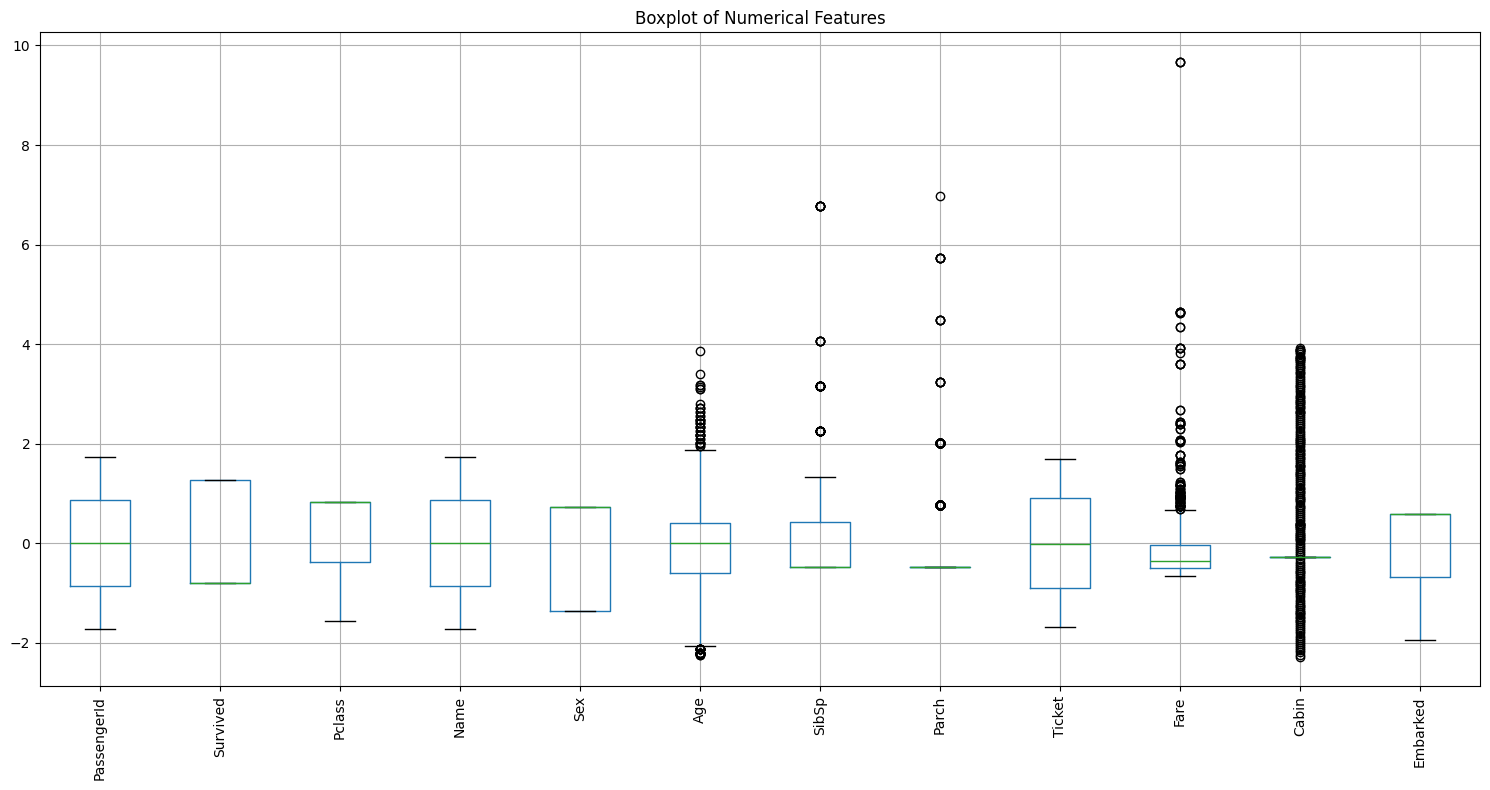

In [20]:
# Step 5: Visualize and remove outliers using boxplots
plt.figure(figsize=(15, 8))
df[numeric_cols].boxplot(rot=90)
plt.title("Boxplot of Numerical Features")
plt.tight_layout()
plt.show()

In [21]:
# Removing outliers using IQR method
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"\nOriginal shape: {df.shape}, After removing outliers: {df_clean.shape}")


Original shape: (891, 12), After removing outliers: (499, 12)
